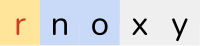
<div style="clear:both"></div>
Rafał Nowak<br/>
<a href="https://github.com/rnoxy">github.com/rnoxy</a>

In [1]:
import torch

In [2]:
N, D = 10, 4
X = torch.randn(N, D)
X.shape

torch.Size([10, 4])

In [3]:
W1 = torch.randn(D, 5, requires_grad=True)
b1 = torch.randn(5, requires_grad=True)

In [4]:
Z1 = torch.matmul(X, W1)+b1
A1 = torch.tanh( Z1 )

In [5]:
A1.shape

torch.Size([10, 5])

In [6]:
W2 = torch.randn(5, 7, requires_grad=True)
b2 = torch.randn(7, requires_grad=True)

In [7]:
Z2 = torch.matmul(A1, W2)+b2
A2 = torch.tanh( Z2 )

In [8]:
A2.shape

torch.Size([10, 7])

In [9]:
W3 = torch.randn(7, 3, requires_grad=True)
b3 = torch.randn(3, requires_grad=True)

In [10]:
Z3 = torch.matmul(A2, W3)+b3

In [11]:
Z3.shape

torch.Size([10, 3])

In [12]:
Z3

tensor([[ 0.5584, -0.8794, -0.1937],
        [-1.7953, -1.3583,  2.6675],
        [-3.0768,  2.1801,  0.6935],
        [-0.5167, -0.3005, -1.1267],
        [-2.5305,  0.3543,  3.4874],
        [-1.6289,  0.3478,  4.8258],
        [-2.1246,  0.7282,  4.0486],
        [ 0.2101, -1.0192,  0.7494],
        [-2.4588, -0.0754,  3.2503],
        [-0.7723, -1.1080,  1.6599]], grad_fn=<AddBackward0>)

In [13]:
torch.exp( Z3 )

tensor([[1.7479e+00, 4.1505e-01, 8.2394e-01],
        [1.6608e-01, 2.5711e-01, 1.4405e+01],
        [4.6104e-02, 8.8471e+00, 2.0007e+00],
        [5.9651e-01, 7.4043e-01, 3.2409e-01],
        [7.9623e-02, 1.4251e+00, 3.2700e+01],
        [1.9615e-01, 1.4160e+00, 1.2469e+02],
        [1.1948e-01, 2.0713e+00, 5.7315e+01],
        [1.2338e+00, 3.6088e-01, 2.1157e+00],
        [8.5536e-02, 9.2740e-01, 2.5797e+01],
        [4.6195e-01, 3.3023e-01, 5.2586e+00]], grad_fn=<ExpBackward0>)

In [14]:
torch.sum( torch.exp( Z3 ), axis=1, keepdim=True )

tensor([[  2.9869],
        [ 14.8277],
        [ 10.8939],
        [  1.6610],
        [ 34.2048],
        [126.3044],
        [ 59.5057],
        [  3.7104],
        [ 26.8103],
        [  6.0508]], grad_fn=<SumBackward1>)

In [15]:
torch.exp( Z3 ) / torch.sum( torch.exp( Z3 ), axis=1, keepdim=True )

tensor([[0.5852, 0.1390, 0.2759],
        [0.0112, 0.0173, 0.9715],
        [0.0042, 0.8121, 0.1837],
        [0.3591, 0.4458, 0.1951],
        [0.0023, 0.0417, 0.9560],
        [0.0016, 0.0112, 0.9872],
        [0.0020, 0.0348, 0.9632],
        [0.3325, 0.0973, 0.5702],
        [0.0032, 0.0346, 0.9622],
        [0.0763, 0.0546, 0.8691]], grad_fn=<DivBackward0>)

In [16]:
logits = Z3
y_pred = torch.softmax( logits, dim=1 )
logits, y_pred

(tensor([[ 0.5584, -0.8794, -0.1937],
         [-1.7953, -1.3583,  2.6675],
         [-3.0768,  2.1801,  0.6935],
         [-0.5167, -0.3005, -1.1267],
         [-2.5305,  0.3543,  3.4874],
         [-1.6289,  0.3478,  4.8258],
         [-2.1246,  0.7282,  4.0486],
         [ 0.2101, -1.0192,  0.7494],
         [-2.4588, -0.0754,  3.2503],
         [-0.7723, -1.1080,  1.6599]], grad_fn=<AddBackward0>),
 tensor([[0.5852, 0.1390, 0.2759],
         [0.0112, 0.0173, 0.9715],
         [0.0042, 0.8121, 0.1837],
         [0.3591, 0.4458, 0.1951],
         [0.0023, 0.0417, 0.9560],
         [0.0016, 0.0112, 0.9872],
         [0.0020, 0.0348, 0.9632],
         [0.3325, 0.0973, 0.5702],
         [0.0032, 0.0346, 0.9622],
         [0.0763, 0.0546, 0.8691]], grad_fn=<SoftmaxBackward0>))

In [17]:
y_true = torch.randint(0, 3, size=(10,))

In [18]:
y_true

tensor([0, 0, 1, 0, 0, 1, 0, 1, 0, 2])

In [19]:
y_one_hot = torch.nn.functional.one_hot(y_true)

In [20]:
y_one_hot

tensor([[1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1]])

In [21]:
- torch.sum( y_one_hot * torch.log( y_pred ) ) / N

tensor(3.1242, grad_fn=<DivBackward0>)

In [22]:
torch.nn.functional.cross_entropy( logits, y_true )

tensor(3.1242, grad_fn=<NllLossBackward0>)

In [23]:
loss = torch.nn.functional.cross_entropy( logits, y_true )

In [24]:
loss

tensor(3.1242, grad_fn=<NllLossBackward0>)

In [25]:
loss.backward()

In [26]:
W1, b1, W2, b2

(tensor([[ 1.4035, -2.2152, -0.9855, -0.9205,  1.0756],
         [-0.9570,  1.6001, -0.3097, -0.8879,  0.0403],
         [ 0.1326, -0.0556, -0.6852, -1.4088,  0.4793],
         [ 1.2443, -0.1473,  0.5796, -0.4653,  1.0097]], requires_grad=True),
 tensor([ 0.2329,  0.8816, -0.7020,  0.9628, -0.3865], requires_grad=True),
 tensor([[-0.3545, -0.0080, -0.3860,  0.9563,  0.2471,  0.3063, -1.2983],
         [-1.2970, -0.5057, -1.6458,  0.1968, -1.3825, -0.9005, -0.4470],
         [-0.1310,  0.6139,  0.0275, -0.9821, -0.7885, -0.8176,  0.4335],
         [-0.9442,  0.0575, -1.0362,  0.6323, -0.2421,  0.5471, -0.0954],
         [ 0.4113,  0.2134, -0.6386, -0.7371, -0.9913,  0.7911, -0.1967]],
        requires_grad=True),
 tensor([-0.7583,  0.3518, -0.9175,  0.3400, -0.2231,  0.5747,  0.4061],
        requires_grad=True))

In [27]:
W1.grad, b1.grad, W2.grad, b2.grad

(tensor([[ 0.4769,  0.1994, -0.2352,  0.0448,  0.1360],
         [ 0.5662,  0.4435, -0.1862,  0.0737,  0.0736],
         [-0.4754, -0.2196,  0.2003, -0.0033, -0.0213],
         [ 0.1278, -0.0008, -0.0360, -0.0879, -0.1725]]),
 tensor([-0.6150, -0.0758,  0.2663,  0.1044,  0.2414]),
 tensor([[ 0.0502,  0.0255, -0.0780,  0.0016,  0.3463, -0.0446, -0.1474],
         [-0.0902, -0.0580,  0.0915,  0.0213, -0.4526,  0.0735,  0.3299],
         [-0.0606,  0.0108,  0.0742, -0.0187,  0.2718, -0.0194, -0.1259],
         [ 0.0593, -0.0704, -0.0330,  0.0178, -0.2801,  0.0735,  0.5378],
         [-0.0085,  0.0596, -0.0199, -0.0137,  0.3812, -0.0761, -0.5236]]),
 tensor([ 0.0523, -0.0931, -0.0634,  0.0241, -0.5177,  0.1069,  0.6550]))